# SD DSL Operators

This document illustrates how to use the operators for the SD DSL. T use the operators, you need to import the `sd_functions`, in addition to importing the `Model` class.

## MAX Operator

The `max` operator always chooses the larger of its two input values.

Signature: `max(element, element)`

`element` can be any model element (stock, flow, converter, constant)

In [1]:
from BPTK_Py import Model
from BPTK_Py import sd_functions as sd

In [2]:
model = Model(starttime=0,stoptime=10,dt=1,name='max')

In [3]:
a = model.converter("a")

In [4]:
a.equation = model.function("fn_a",lambda model, t: 5 if t<5 else 10)()

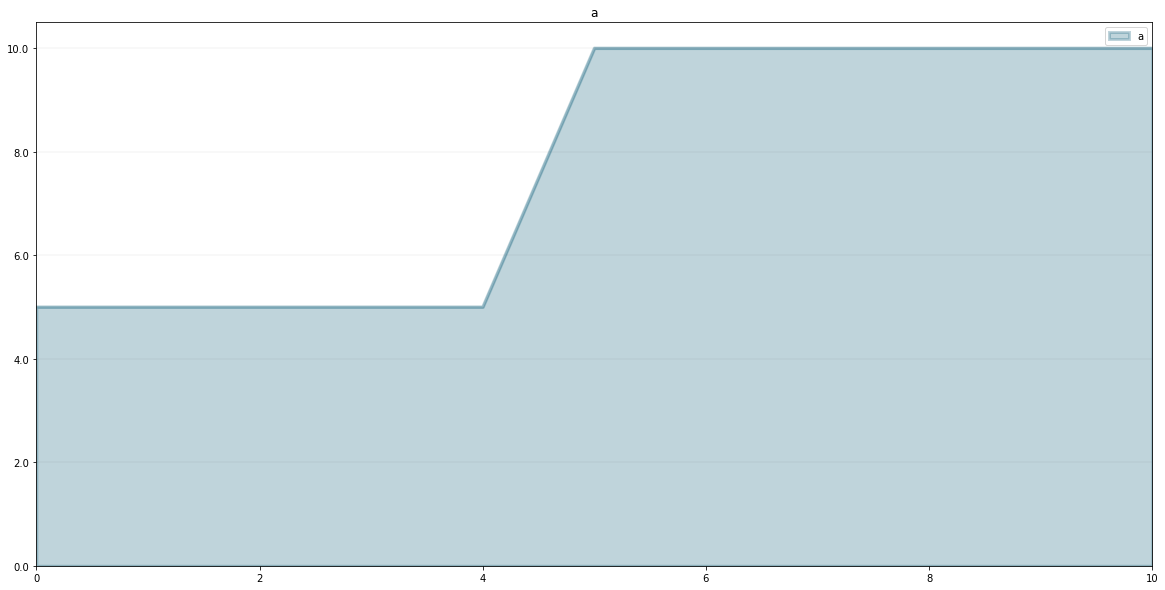

In [5]:
a.plot()

In [6]:
b = model.converter("b")

In [7]:
b.equation=model.function("fn_b",lambda model,t: 10 if t<5 else 5)()

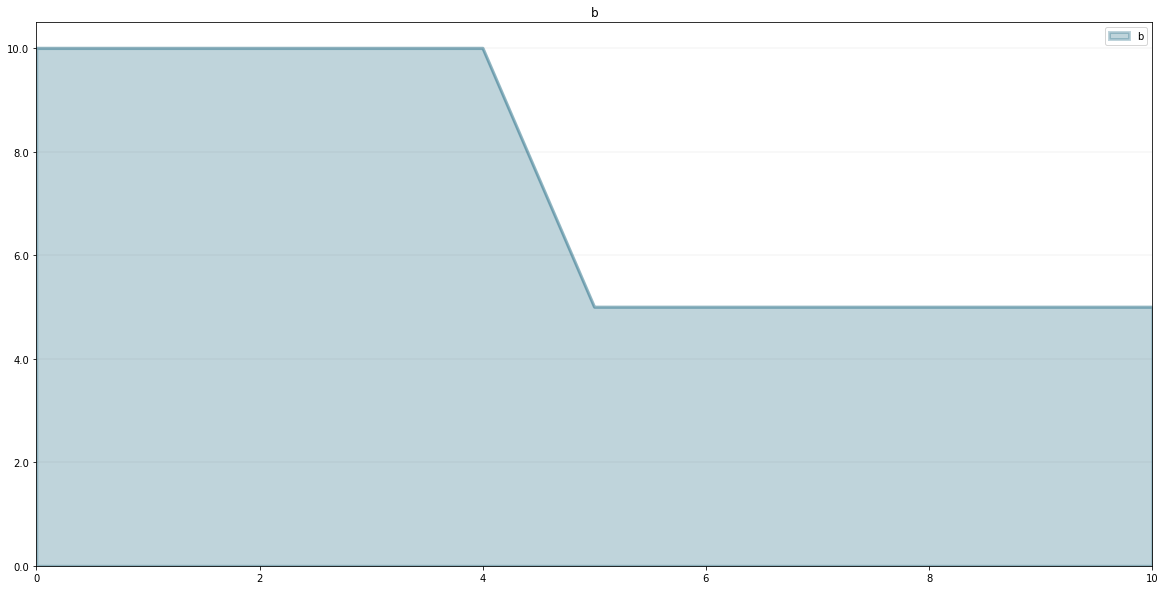

In [8]:
b.plot()

In [9]:
c = model.converter("c")

In [10]:
c.equation=sd.max(a,b)

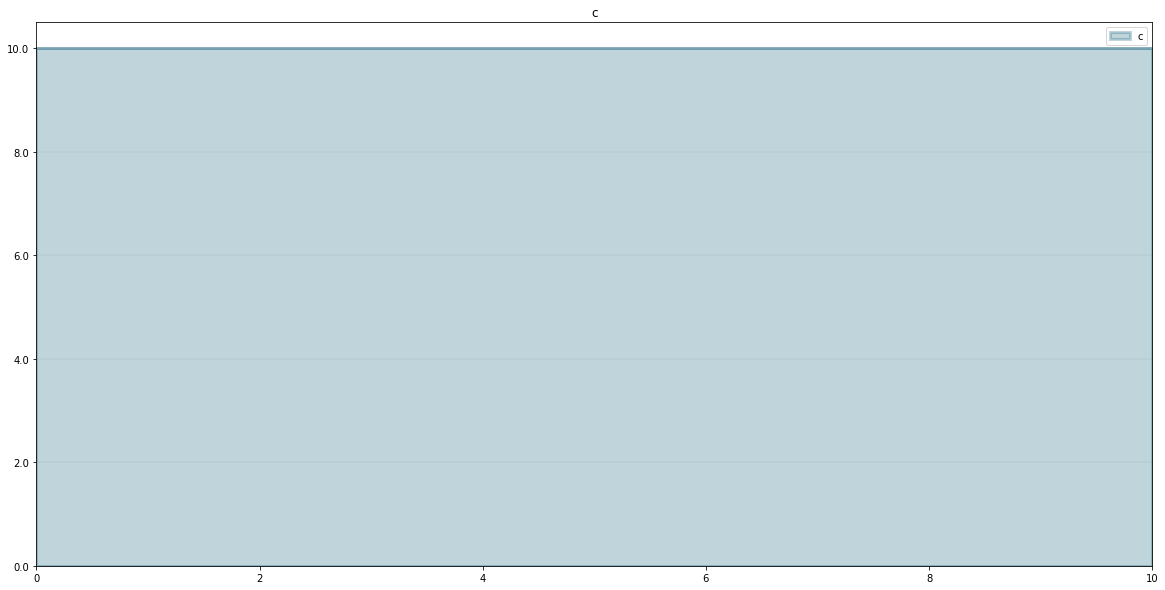

In [11]:
c.plot()

## MIN Operator

The `min` operator always chooses the smaller of its two input values.

Signature: `min(element, element)`

`element` can be any model element (stock, flow, converter, constant)

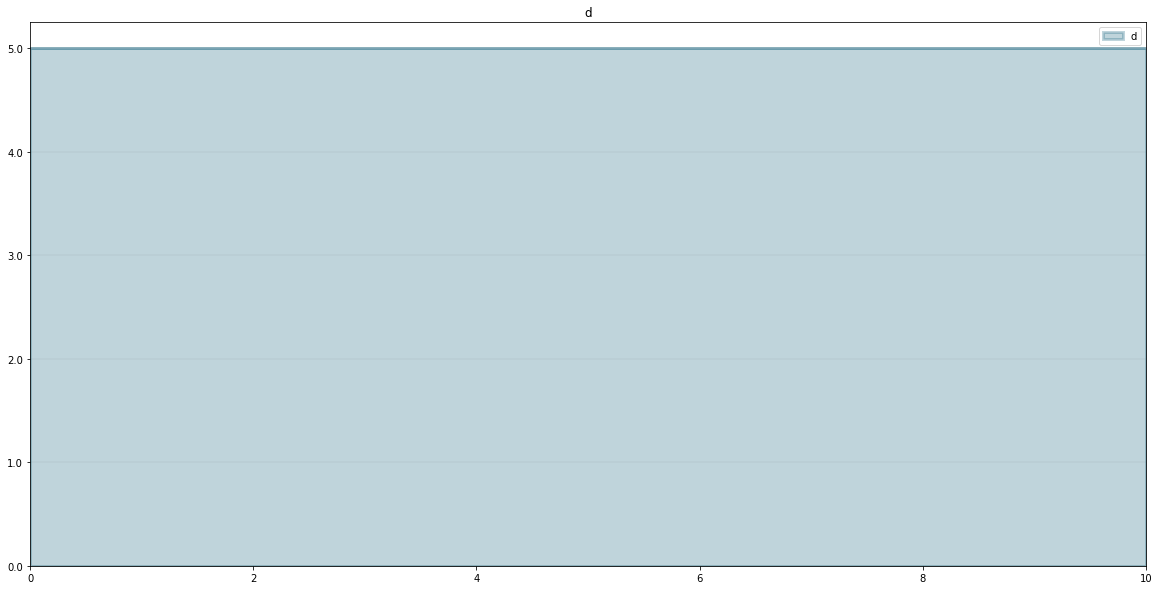

In [12]:
from BPTK_Py import Model
from BPTK_Py import sd_functions as sd

model = Model(starttime=0,stoptime=10,dt=1,name='max')

a = model.converter("a")

a.equation = model.function("fn_a",lambda model, t: 5 if t<5 else 10)()

b = model.converter("b")

b.equation=model.function("fn_b",lambda model,t: 10 if t<5 else 5)()

c = model.converter("d")

c.equation = sd.min(a,b)

c.plot()

## TIME operator

The `time` operator returns the current simulation time.

Signature: `time()`

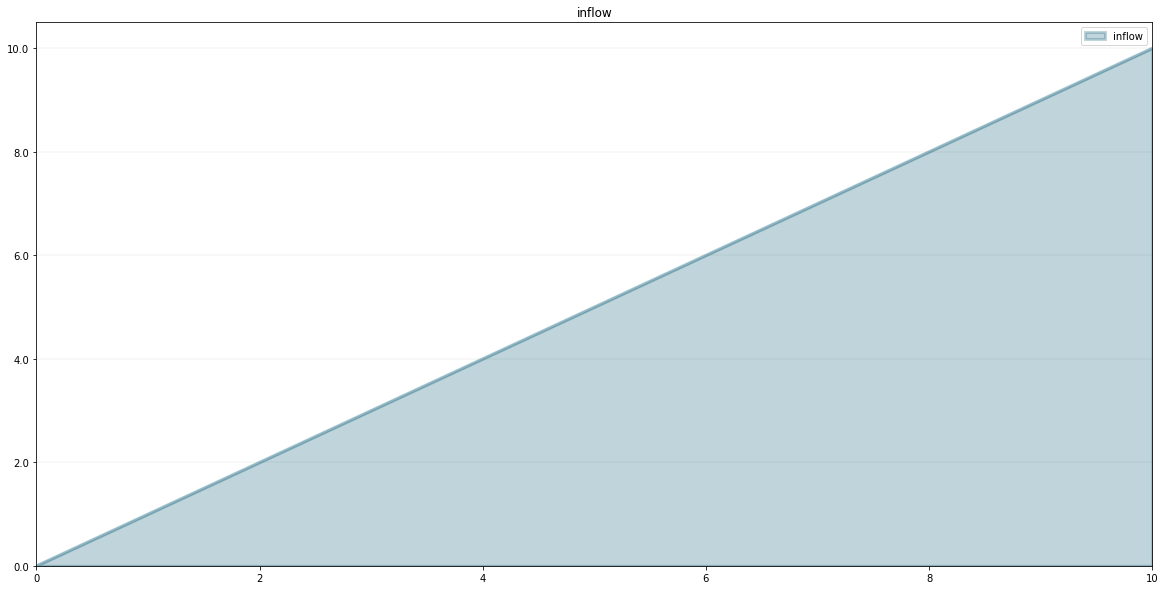

In [13]:
from BPTK_Py import Model
from BPTK_Py import sd_functions as sd

model = Model(starttime=0,stoptime=10,dt=1,name='time')

stock = model.stock("stock")

stock.initial_value=0.0

inflow = model.flow("inflow")

inflow.equation = sd.time()

stock.equation = inflow

inflow.plot()

## SMOOTH Operator

The SMOOTH operator calculates the exponential average of the input, given the input function, an initial value and an averaging time. 

Signature: `smooth(model, input_function, averaging_time, initial_value)`

`model`: The model you are writing equations for

`input_function`: any model element

`averaging_time`: any model element

`initial_value`: a floating point value or constant

The SMOOTH operator is a shorthand for the following stock and flow structure and equations:

![Stock and Flow Structure for the TREND Operator](images/in_depth_sd_dsl_operators/smooth_model.png)



In [14]:
from BPTK_Py import Model
from BPTK_Py import sd_functions as sd

model = Model(starttime=1,stoptime=10,dt=0.1,name='smooth')

input_function = model.converter("input_function")
input_function.equation=sd.step(10.0,3.0)
smooth = model.converter("smooth")
smooth.equation=sd.smooth(model, input_function,2.0,0.0)

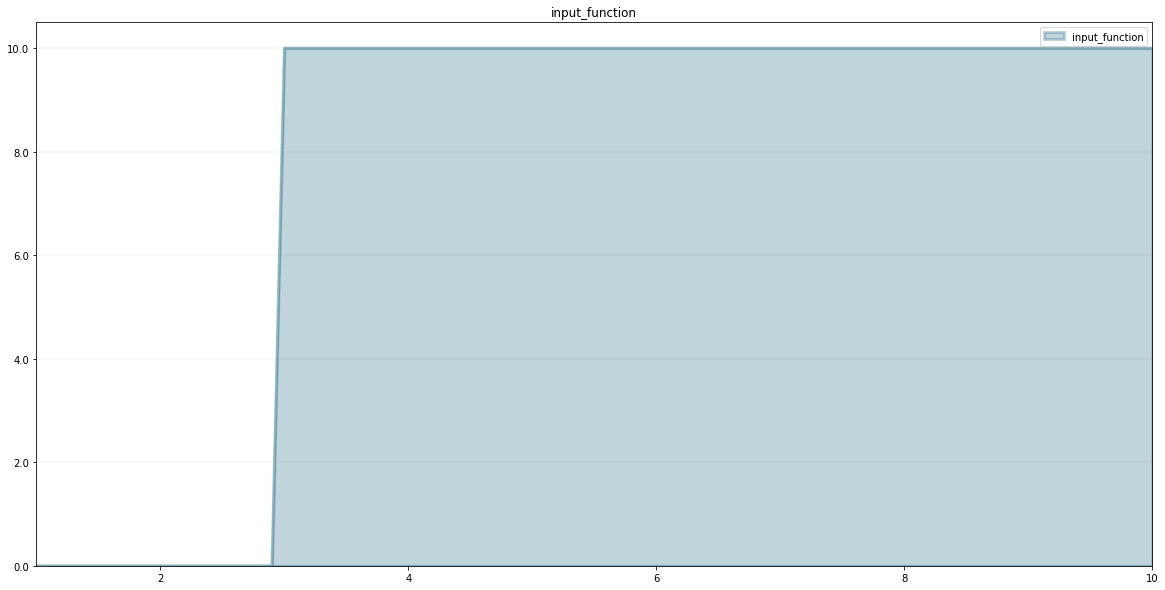

In [15]:
input_function.plot()

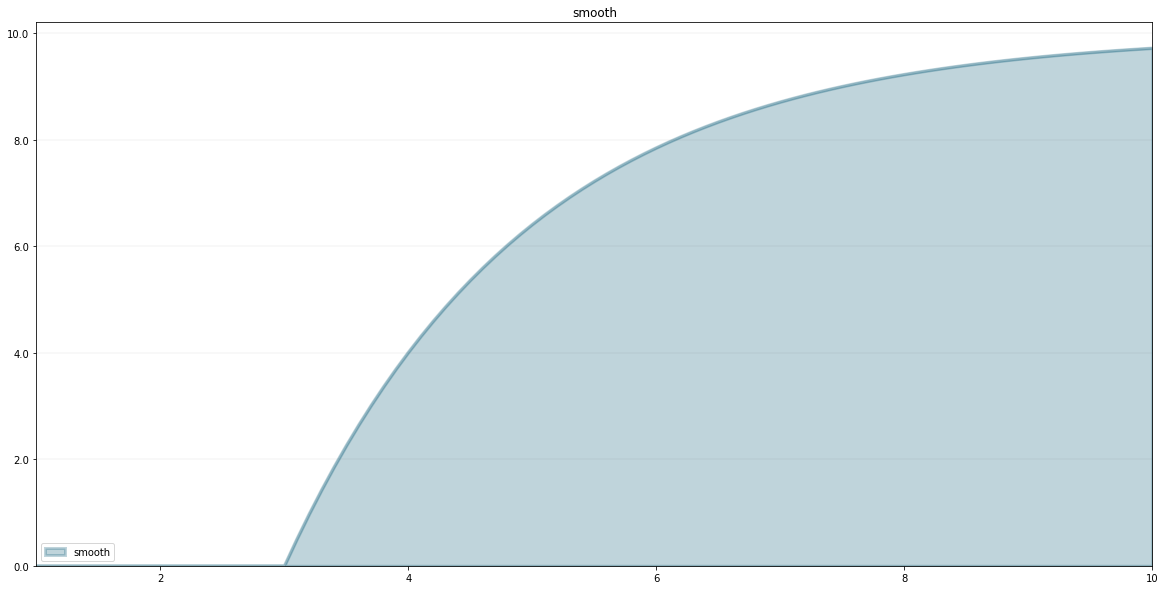

In [16]:
smooth.plot()

## STEP operator

The STEP operator generates a change of specified height, which occurs at a specified time. 

Signature: `step(height, timestep)`

`input_function`: any model element or a floating point number

`averaging_time`: any model element or a floating point numnber

`initial_value`: a floating point value or a constant


In [17]:
from BPTK_Py import Model
from BPTK_Py import sd_functions as sd

model = Model(starttime=1,stoptime=10,dt=1,name='step')

step = model.converter("step")
step.equation=sd.step(10.0,5.0)

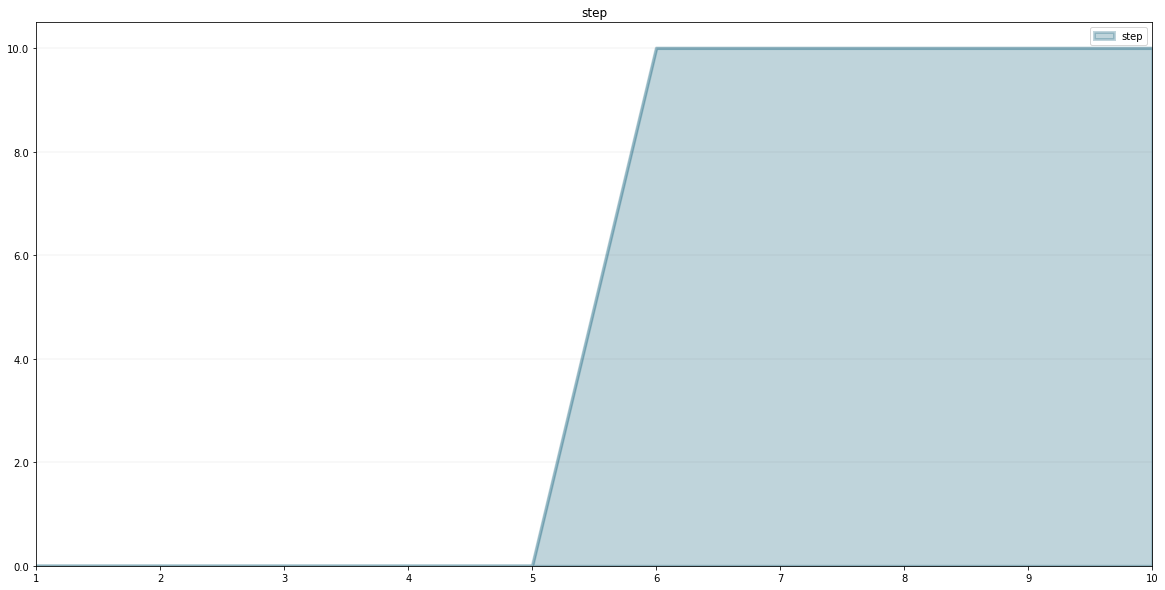

In [18]:
step.plot()

## TREND operator

The TREND operator calculates the trend in the input, given the input, an initial value and an averaging time. The TREND is defined to be the relative change in input compared to the exponential average of input per averaging time. 
Signature: `trend(model, input_function, averaging_time, initial_value)`

`model`: The model you are writing equations for

`input_function`: any model element

`averaging_time`: any model element

`initial_value`: a floating point value or constant

The TREND operator is a shorthand for the following stock and flow structure and equations:

![Stock and Flow Structure for the TREND Operator](images/in_depth_sd_dsl_operators/trend_model.png)



In [19]:
from BPTK_Py import Model
from BPTK_Py import sd_functions as sd

model = Model(starttime=1,stoptime=10,dt=1,name='trend')

input_function = model.converter("input_function")
input_function.equation=sd.time()


trend = model.converter("trend")

trend.equation = sd.trend(model,input_function,1.0,1.0)

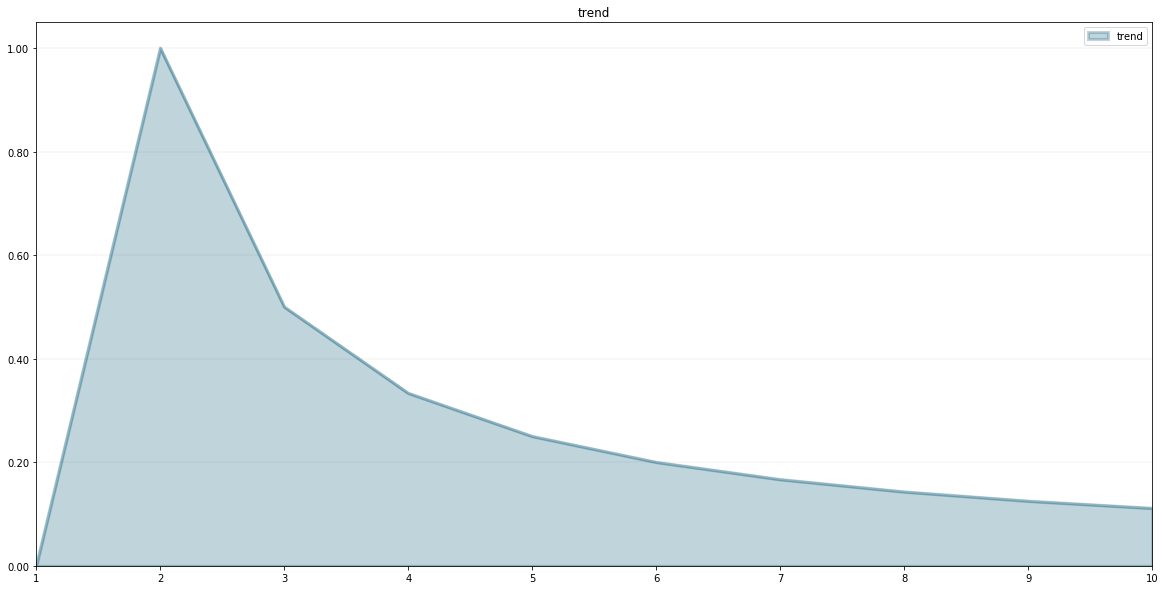

In [20]:
trend.plot()

In [21]:
trend.plot(return_df=True)

,trend
1,0.000000
2,1.000000
3,0.500000
4,0.333333
5,0.250000
6,0.200000
7,0.166667
8,0.142857
9,0.125000
10,0.111111
